In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('grandes.txt', sep='\t')

In [1]:
general = df.describe()
ab = df.loc[df.index,['PPC', 'ROE', 'ROA']]
ab1 = df.loc[df.index,['PPC']]
ab2 = df.loc[df.index,['ROE']]
ab3 = df.loc[df.index,['ROA']]




#stats.f_oneway(ab1, ab2, ab3)



NameError: name 'df' is not defined

#### promedio 

In [4]:
##el promedio que se demoran en cobrar
ab1.mean()

PPC    48.028967
dtype: float64

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_1 = ols ('ab2 ~ ab1',
              data = ab).fit()
anova_result = sm.stats.anova_lm(model_1, typ=2)

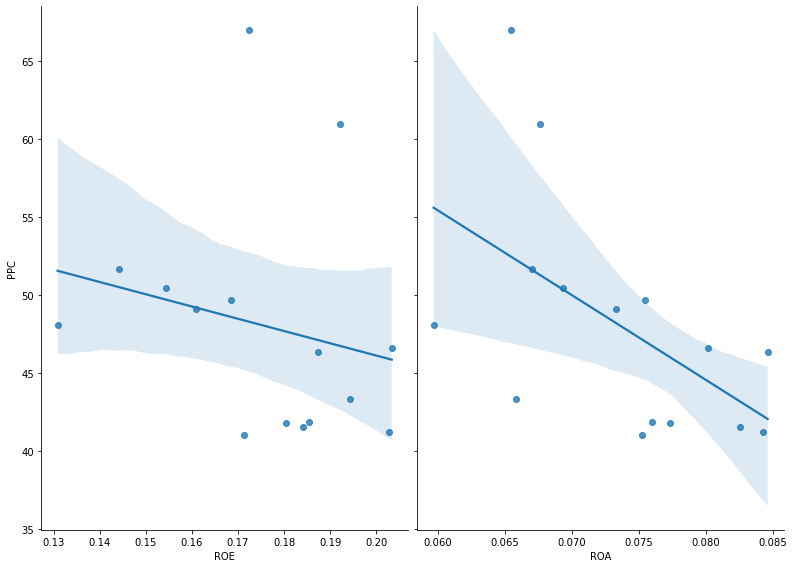

In [6]:
sns.pairplot(ab,x_vars=['ROE','ROA'], y_vars=['PPC'],
             height=8, aspect=.7, kind="reg")

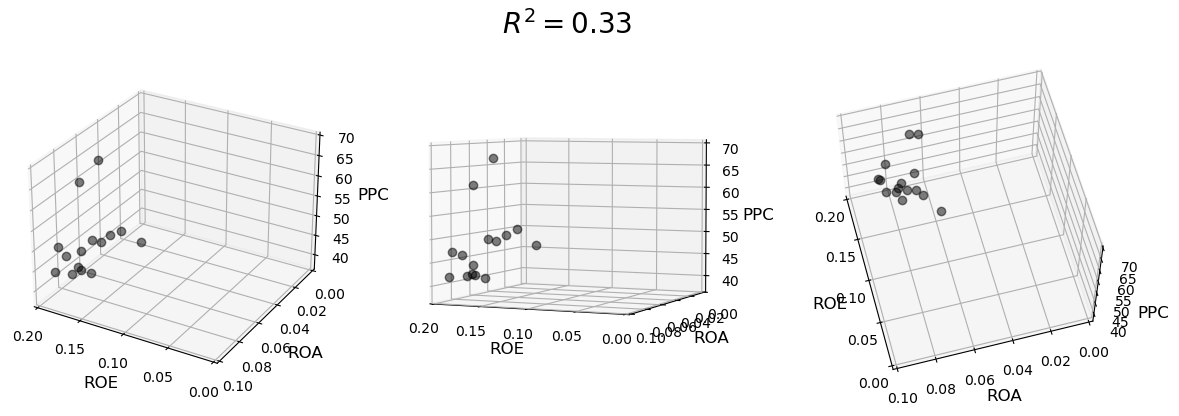

In [7]:

X = ab[['ROE', 'ROA']].values.reshape(-1,2)
Y = ab['PPC']

# Preparando el modelo de datos para vizualizaciones

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Entrenar el modelo para predecir

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

#Evaluar el modelo  

r2 = model.score(X, Y)

# Graficando en 3D

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('ROE', fontsize=12)
    ax.set_ylabel('ROA', fontsize=12,)
    ax.set_zlabel('PPC', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_xlim([0, 0.20])
    ax.set_ylim([0, 0.1])
    ax.set_zlim([37, 70])
    

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

### PREDECIR CUÁNTO DE PPC TENGO QUE TENER PARA ALCANZAR MIS ROE Y ROA DESEADOS

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(ab[['ROE','ROA']],ab['PPC'])

LinearRegression()

In [32]:
model.predict([[0.25,0.09]])

array([42.49307108])

In [26]:
model.coef_

array([  73.67734684, -671.278153  ])

In [11]:
model.intercept_

84.48876813904982

In [25]:
0.14*73.67734684+0.09*-671.278153 + 84.48876813904982

34.38856292664983

### PREDECIR ROE SEGUN PERIODOS DE COBRO

In [13]:
from sklearn.linear_model import LinearRegression
ppc_1 = LinearRegression()
ppc_1.fit(ab[['PPC']],ab[['ROE']]) 


LinearRegression()

In [14]:
ppc_1.predict([[48]])  # Input PPPC (45), output (Rentabilidad ROE y ROA) 

array([[0.17549202]])

#### Coeficiente Angular de las variables

In [15]:
ppc_1.coef_


array([[-0.00061641]])

#### Coef. Intercept o Const

In [16]:
ppc_1.intercept_

array([0.20507961])

#### Comprobación del modelo

In [17]:
-0.00061641*48+0.20507961  ## El resultado de aqui tine que ser igual al de ppc_1.predict (x)

0.17549193

### MODELO EN ACCION (Ejecutar e interactuar)

### Predecir ROE según PPC

In [18]:
linea = "____"
separador = (linea * 25 )
print(separador, "\n")
print("                         PAULA SUNTAXI   Y    LIZBETH ABARCA                         ")                       
print(separador)

pregunta_ppc =  int(input("BIENVENIDO/A AL MODELO PREDICTIVO DE SUNTAXI Y ABARCA,  INTRODUZCA SUS PERIODOS PROMEDIOS DE COBRO \n"
"Y OBTENDRÁ SU RENTABILIDAD PROYECTADA PARA EL SIGUIETNE EJERCICIO CONTABLE: "))

respuesta_ppc = (ppc_1.predict([[pregunta_ppc]]))

if respuesta_ppc < 0 :
        print(separador, "\n")
        print("SU NEGOCIO DEMORA MUCHO EN COBRAR, UD PERDERÍA {}% DE RENTABILIDAD (ROE) PARA  \n"
        "EL SIGUIENTE PERIODO FISCAL".format(respuesta_ppc*100))
        print(separador, "\n")
        
if respuesta_ppc > 0 :
        print(separador, "\n")
        print ("SEGUN SUS PERIODOS DE COBRO, SU RENTABILIDAD PROYECTADA PARA EL SIGUIENTE PERIODO FISCAL ES DE {}%".format(respuesta_ppc*100))
        print(separador, "\n")

____________________________________________________________________________________________________ 

                         PAULA SUNTAXI   Y    LIZBETH ABARCA                         
____________________________________________________________________________________________________
BIENVENIDO/A AL MODELO PREDICTIVO DE SUNTAXI Y ABARCA,  INTRODUZCA SUS PERIODOS PROMEDIOS DE COBRO 
Y OBTENDRÁ SU RENTABILIDAD PROYECTADA PARA EL SIGUIETNE EJERCICIO CONTABLE: 90
____________________________________________________________________________________________________ 

SEGUN SUS PERIODOS DE COBRO, SU RENTABILIDAD PROYECTADA PARA EL SIGUIENTE PERIODO FISCAL ES DE [[14.96028735]]%
____________________________________________________________________________________________________ 



#### Predecir ROA

In [19]:
from sklearn.linear_model import LinearRegression
ppc_2 = LinearRegression()
ppc_2.fit(ab[['PPC']],ab[['ROA']]) 

LinearRegression()

#### Prueba del modelo predictivo

In [20]:
ppc_2.predict([[48]])

array([[0.07358947]])

#### Coeficiente Angular

In [21]:
ppc_2.coef_


array([[-0.00055202]])

#### Coef. Interceptor o Constante

In [22]:
ppc_2.intercept_

array([0.10008665])

#### Prueba de fuego

In [23]:
-0.00055202 *(48) + 0.10008665

0.07358969

In [24]:
linea = "____"
separador = (linea * 25 )
print(separador, "\n")
print("                         PAULA SUNTAXI   Y    LIZBETH ABARCA                         ")                       
print(separador)

pregunta_ppc2 =  int(input("BIENVENIDO/A AL MODELO PREDICTIVO DE SUNTAXI Y ABARCA,  INTRODUZCA SUS PERIODOS PROMEDIOS DE COBRO \n"
"Y OBTENDRÁ SU RENTABILIDAD DE SUS ACTIVOS (ROA) PROYECTADA PARA EL SIGUIETNE EJERCICIO CONTABLE: "))

respuesta_ppc2 = (ppc_2.predict([[pregunta_ppc2]]))

if respuesta_ppc2 < 0 :
        print(separador, "\n")
        print("SU NEGOCIO DEMORA MUCHO EN COBRAR, UD PERDERÍA {}% DE RENTABILIDAD (ROA) PARA  \n"
        "EL SIGUIENTE PERIODO FISCAL".format(respuesta_ppc2*100))
        print(separador, "\n")
        
if respuesta_ppc2 > 0 :
        print(separador, "\n")
        print ("SEGUN SUS PERIODOS DE COBRO, SU RENTABILIDAD PROYECTADA PARA EL SIGUIENTE PERIODO FISCAL ES DE {}%".format(respuesta_ppc2*100))
        print(separador, "\n")

____________________________________________________________________________________________________ 

                         PAULA SUNTAXI   Y    LIZBETH ABARCA                         
____________________________________________________________________________________________________
BIENVENIDO/A AL MODELO PREDICTIVO DE SUNTAXI Y ABARCA,  INTRODUZCA SUS PERIODOS PROMEDIOS DE COBRO 
Y OBTENDRÁ SU RENTABILIDAD DE SUS ACTIVOS (ROA) PROYECTADA PARA EL SIGUIETNE EJERCICIO CONTABLE: 90
____________________________________________________________________________________________________ 

SEGUN SUS PERIODOS DE COBRO, SU RENTABILIDAD PROYECTADA PARA EL SIGUIENTE PERIODO FISCAL ES DE [[5.04044398]]%
____________________________________________________________________________________________________ 

